In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Given a training set $\mathcal{D}$ of $m\ n$-dimensional training examples $(\mathbf{x}_i, y_i)$, the **Perceptron Learning Algorithm** (PLA) tries to find a hypothesis function $h$ that predicts the label $y_i$ of every $\mathbf{x}_i$ correctly.

The hypothesis function of the Perceptron is $h(\mathbf{x}) = \mathrm{sign}(\mathbf{x} \cdot \mathbf{b})$. The set $\mathcal{H}$ of hypothesis functions is the set of $n-1$ dimensional hyperplanes.

In [3]:
def hypothesis(x, w):
    return np.sign(np.dot(x, w))

In [4]:
def predict(hypothesis_function, X, y, w):
    predictions = np.apply_along_axis(hypothesis_function, 1, X, w)
    misclassified = X[y != predictions]
    return misclassified

In [5]:
def pick_one_from(misclassified_examples, X, y):
    np.random.shuffle(misclassified_examples)
    x = misclassified_examples[0]
    index = np.where(np.all(X == x, axis=1))
    return x, y[index]

In [99]:
def perceptron_learning_algorithm(X, y):
    w = np.random.rand(3)
    misclassified_examples = predict(hypothesis, X, y, w)
    
    while misclassified_examples.any():
        x, expected_y = pick_one_from(misclassified_examples, X, y)
        w = w + x * expected_y
        misclassified_examples = predict(hypothesis, X, y, w)
        
    return w

In [238]:
def color(X):
    return ['b' if x == 1 else 'r' for x in X]

def marker(X):
    return ['x' if x == 1 else '+' for x in X]

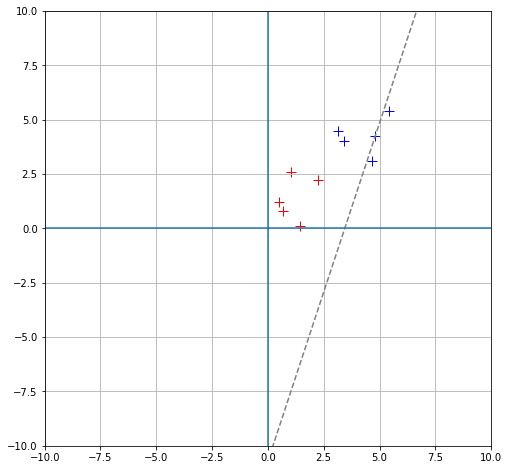

In [300]:
N = 5
a = [list(np.random.rand(2)*3) for _ in range(N)]
b = [list(np.random.rand(2)*3 + 3) for _ in range(N)]
X = np.array(a + b)

y = np.array([-1] * N + [1] * N)
X_augmented = np.c_[np.ones(X.shape[0]), X]
w = perceptron_learning_algorithm(X_augmented, y)

plt.figure(figsize=(8,8))
ax = plt.gca()
d = 10
ax.set_xlim([-d,d])
ax.set_ylim([-d,d])
lx = np.array(ax.get_xlim())
ly = w[1] * x + w[0]
scatter(X[:,0], X[:,1], c=color(y), marker='+', lw=1, s=100)
plot(lx, ly, ls='dashed', c='gray')
axhline(0); axvline(0)
grid()

In [267]:
X_augmented, y

(array([[1.        , 0.62308014, 0.75312567],
        [1.        , 0.81083336, 1.53507021],
        [1.        , 0.88788717, 1.61507974],
        [1.        , 2.96148884, 1.96850905],
        [1.        , 1.49174068, 0.03474701],
        [1.        , 4.96370655, 3.017238  ],
        [1.        , 5.21399411, 4.20825911],
        [1.        , 5.80338145, 3.56772631],
        [1.        , 5.56422838, 5.80124721],
        [1.        , 3.25101176, 5.11285436]]),
 array([-1, -1, -1, -1, -1,  1,  1,  1,  1,  1]))